In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# 1. 데이터 로드 및 전처리

df = pd.read_csv('../DSA_features.csv')
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [2]:
# activity 열에 포함된 고유한 값(활동 유형) 확인
unique_activities = df['activity'].unique()
print(unique_activities)

['sitting' 'standing' 'lyingBack' 'lyingRigh' 'ascendingStairs'
 'decendingStairs' 'standingInElevatorStill' 'movingInElevator'
 'walkingLot' 'walkingTreadmillFlat' 'walkingTreadmillIncline'
 'runningTreadmill' 'stepper' 'crossTrainer' 'cyclingHorizontal'
 'cyclingVertical' 'rowing' 'jumping' 'basketBall']


In [3]:
# lyingRight, lyingBack (정상), stepper (비정상) 데이터 필터링
df = df[df['activity'].isin(['lyingRight', 'lyingBack', 'stepper'])]

# 정상: 0 (lying), 비정상: 1 (stepper) 라벨 설정
df['label'] = df['activity'].apply(lambda x: 0 if x in ['lyingRight', 'lyingBack'] else 1)

# 라벨과 사람 ID, 활동명을 제외한 피처만 선택
features = df.drop(['activity', 'label', 'people'], axis=1)
labels = df['label'].values

C:\Users\tyra\AppData\Local\Temp\ipykernel_20492\4095620194.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['activity'].apply(lambda x: 0 if x in ['lyingRight', 'lyingBack'] else 1)


In [4]:
# 2. 데이터 정규화 및 학습/테스트 분할

In [5]:
# 데이터 정규화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 정상 데이터만으로 학습 데이터 구성
train_data = features_scaled[labels == 0]

# 테스트 데이터 전체
test_data = features_scaled
test_labels = labels

In [6]:
# 3. Autoencoder 모델 정의 및 학습

In [7]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Autoencoder 모델 정의
input_dim = train_data.shape[1]

# 입력 레이어
input_layer = Input(shape=(input_dim,))

# 인코더
encoder = Dense(64, activation="relu")(input_layer)
encoder = Dense(32, activation="relu")(encoder)
encoder = Dense(16, activation="relu")(encoder)

# 잠재 공간
latent_space = Dense(16, activation="relu")(encoder)

# 디코더
decoder = Dense(32, activation="relu")(latent_space)
decoder = Dense(64, activation="relu")(decoder)

# 출력 레이어
output_layer = Dense(input_dim, activation="linear")(decoder)

# 모델 정의
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# 모델 컴파일
autoencoder.compile(optimizer='adam', loss='mse')

# 모델 학습
autoencoder.fit(train_data, train_data, epochs=50, batch_size=32, shuffle=True, validation_split=0.1)


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.8902 - val_loss: 0.5744
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6709 - val_loss: 0.3875
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5335 - val_loss: 0.3097
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4041 - val_loss: 0.2881
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3425 - val_loss: 0.2792
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3750 - val_loss: 0.2771
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3221 - val_loss: 0.2805
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3496 - val_loss: 0.2848
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3426 - val_loss: 0.2826
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2639 - val_loss: 0.2783
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2274 - val_loss: 0.2697
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2277 - val_l

In [8]:
# 4. 테스트 데이터에서 재구성 오류 계산


In [9]:
# Autoencoder를 통해 재구성 오류 계산
test_predictions = autoencoder.predict(test_data)
mse = np.mean(np.power(test_data - test_predictions, 2), axis=1)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step


In [10]:
# 5. 임계값 설정 및 비정상 데이터 분류

In [11]:
# 임계값 설정 (예: 정상 데이터의 95번째 백분위수)
threshold = np.percentile(mse[labels == 0], 95)

# 예측: 임계값보다 큰 오류는 비정상(1), 작은 오류는 정상(0)으로 분류
predictions = [1 if error > threshold else 0 for error in mse]

In [12]:
#6. 정확도 평가

In [13]:
# 정확도 계산
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_labels, predictions)
print("Autoencoder Model Accuracy: {:.2f}%".format(accuracy * 100))

Autoencoder Model Accuracy: 96.15%


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step
Threshold for anomaly detection: 0.39842318833650786


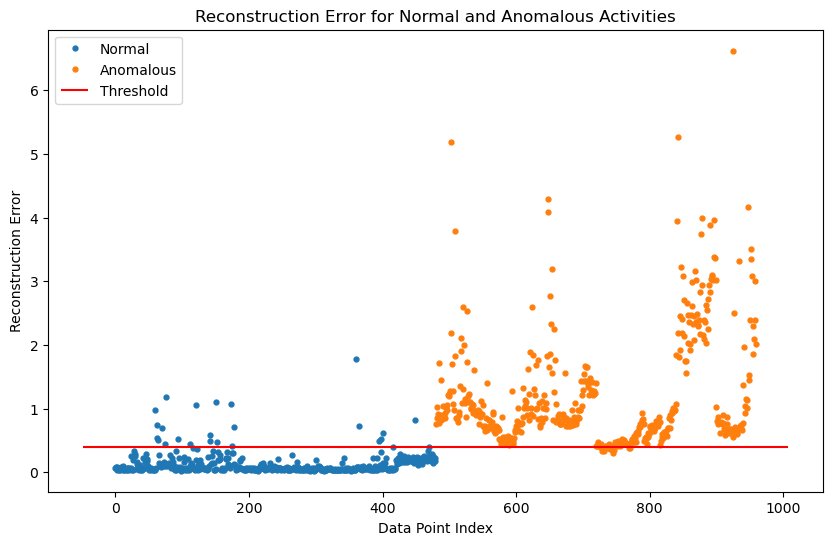

In [16]:
#7. 시각화

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 테스트 데이터를 Autoencoder로 예측하여 재구성된 값을 생성
test_predictions = autoencoder.predict(test_data)
# 재구성 오차(MSE) 계산
mse = np.mean(np.power(test_data - test_predictions, 2), axis=1)

# 재구성 오차와 실제 클래스(정상/비정상)를 포함한 데이터프레임 생성
error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': test_labels})

# 재구성 오차의 임계값 설정
threshold = np.percentile(mse[labels == 0], 95)  # 95번째 백분위수 사용
print(f"Threshold for anomaly detection: {threshold}")

# 'true_class' 기준으로 데이터를 그룹화하여 시각화
groups = error_df.groupby('true_class')
fig, ax = plt.subplots(figsize=(10, 6))

# 정상과 비정상 데이터 그룹을 순회하며 그래프에 플롯
for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, 
            marker='o', ms=3.5, linestyle='',
            label="Anomalous" if name == 1 else "Normal")

# 임계값 선 추가
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')

# 그래프 제목, 레이블 및 범례 설정
ax.legend()
plt.title("Reconstruction Error for Normal and Anomalous Activities")
plt.ylabel("Reconstruction Error")
plt.xlabel("Data Point Index")
plt.show()


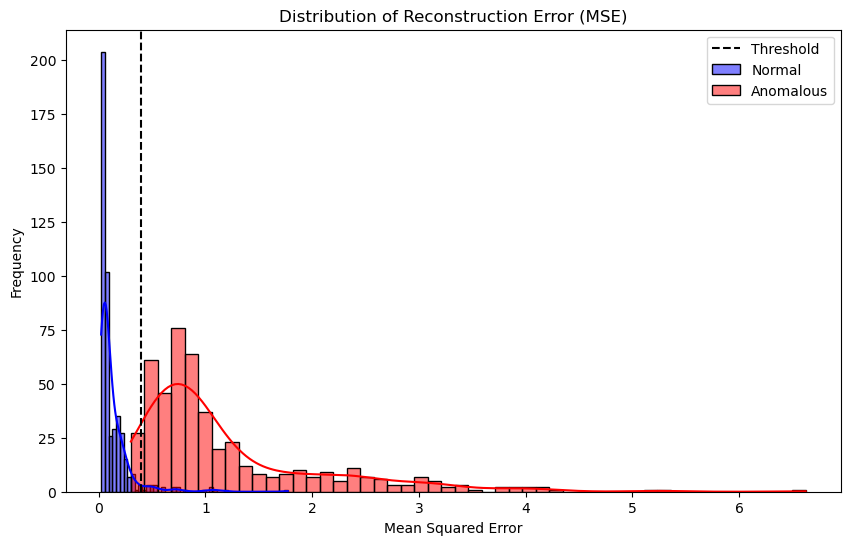

C:\Users\tyra\AppData\Local\Temp\ipykernel_20492\2302549875.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=predictions, palette="Set2")


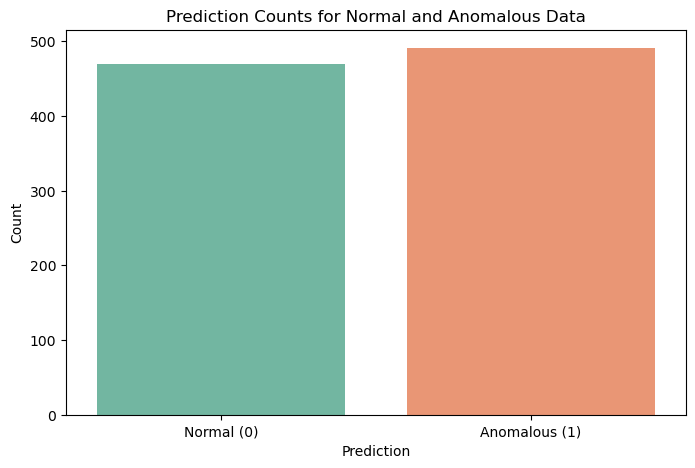

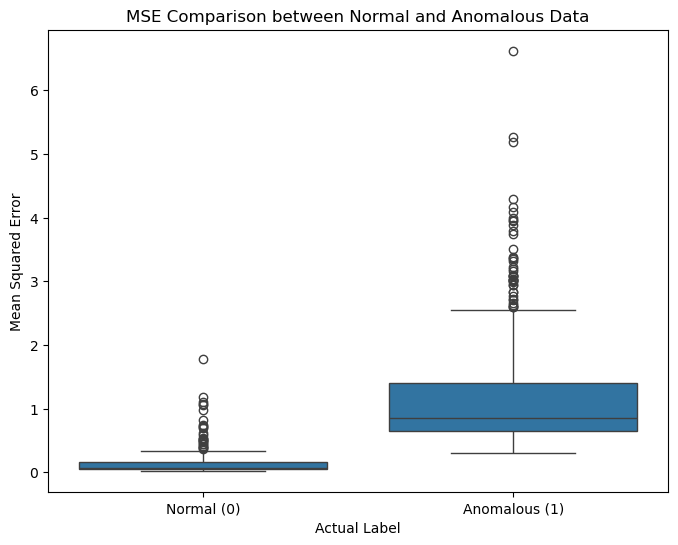

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# MSE 분포 그래프
plt.figure(figsize=(10, 6))
sns.histplot(mse[labels == 0], bins=50, color="blue", label="Normal", kde=True)
sns.histplot(mse[labels == 1], bins=50, color="red", label="Anomalous", kde=True)
plt.axvline(x=threshold, color='black', linestyle='--', label='Threshold')
plt.xlabel("Mean Squared Error")
plt.ylabel("Frequency")
plt.title("Distribution of Reconstruction Error (MSE)")
plt.legend()
plt.show()

# 예측 결과 시각화 (정확도에 따른 비교)
plt.figure(figsize=(8, 5))
sns.countplot(x=predictions, palette="Set2")
plt.xticks([0, 1], ['Normal (0)', 'Anomalous (1)'])
plt.xlabel("Prediction")
plt.ylabel("Count")
plt.title("Prediction Counts for Normal and Anomalous Data")
plt.show()

# 정상과 비정상 데이터의 평균 MSE 비교
plt.figure(figsize=(8, 6))
sns.boxplot(x=labels, y=mse)
plt.xticks([0, 1], ['Normal (0)', 'Anomalous (1)'])
plt.xlabel("Actual Label")
plt.ylabel("Mean Squared Error")
plt.title("MSE Comparison between Normal and Anomalous Data")
plt.show()
